---
## 가중치 초기화(Weights Initialization)
---
만약 가중치의 값이 일부 값으로 치우치게 되면,  
활성화 함수를 통과한 값들도 치우치게 되고,  
결국 표현할 수 있는 신경망의 수가 적어지는 문제가 발생  

보통 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생할 수 있다  
모델의 활성화 값이 골고루 분포 되는 것이 중요  

In [43]:
from tensorflow.keras import models, layers, optimizers
'''
지정된 활성화 함수 activation과 초기화 initializer에 따라 모델을 생성하는 build_model 함수
'''
def build_model(activation, initializer):
    model = models.Sequential()
    model.add(layers.Input(shape=(400, 20), name='input'))
    model.add(layers.Dense(20, activation=activation, name='hidden1', 
                           kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden2', 
                           kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden3', 
                           kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden4', 
                           kernel_initializer=initializer))
    model.add(layers.Dense(20, activation=activation, name='hidden5', 
                           kernel_initializer=initializer))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizers.SGD(),
                  metrics=['accuracy'])
    return model

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
'''
각 레이어마다 분포값을 히스토그램으로 출력하기 위한 show_layer 함수
'''
def show_layer(model):
    input = np.random.randn(400, 20)

    plt.figure(figsize=(12, 6))
    for i in range(1, 6):
        name = 'hidden' + str(i)
        layer = model.get_layer(name)
        input = layer(input)
        plt.subplot(1, 6, i)
        plt.title(name)
        plt.hist(input, 20, range=(-1, 1))
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.show()   

### 선형 함수 가중치 초기화
활성화 함수 중에서 activations.sigmoid를 사용하여 초기화 방법들을 비교해봅니다  
***sigmoid 함수**는 전체적으로는 볼 때 비선형 함수이지만 **특정 범위(-1, 1)에서는 선형 함수**  
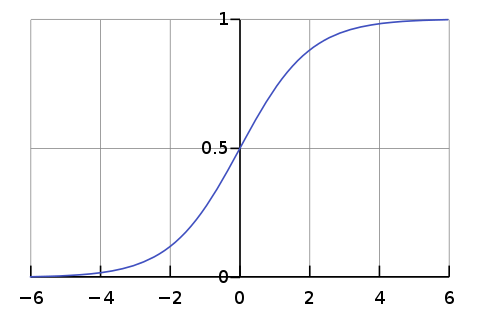  

#### 제로 초기화
가중치를 제로값으로 초기화 할 경우 각 레이어의 가중치 값 분포가 **중앙으로만** 몰려 있음  
가중치 값이 0일 경우 오차역전파에서 **모든 가중치 값이 똑같이 갱신**되어 학습 진행 불가  

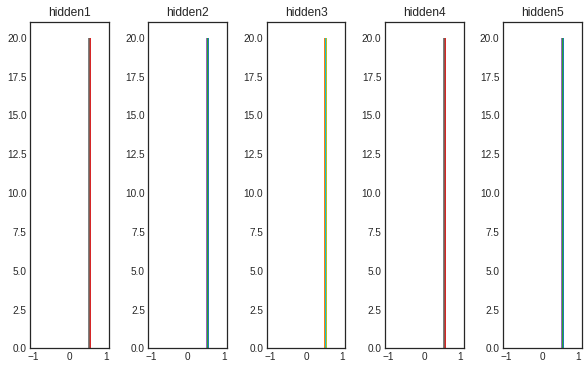

In [3]:
from tensorflow.keras import initializers, activations

# initializers.Zeros()를 이용해 가중치를 제로값으로 초기화
model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

참고: 각 레이어의 값이 0.5에 몰려 있는 이유
가중치 값이 활성화 함수로 사용한 sigmoid 함수를 통과하였기 때문 (sigmoid(0)=0.5)

#### 정규분포 초기화
정규분포를 따르도록 무작위 값을 초기화한 결과, 제로 초기화보다는 분포가 퍼져있는 것을 알 수 있음  
그러나 한 곳에 치우쳐 있기 때문에 여전히 신경망의 표현을 제한한다는 문제가 있음  

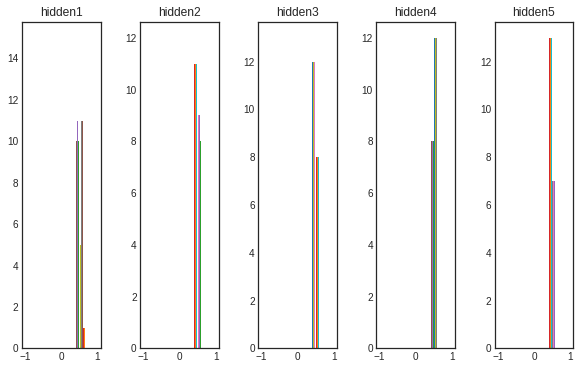

In [4]:
# initializers.RandomNormal()를 통해 정규분포를 따르도록 무작위 값을 초기화
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

#### 균일분포 초기화
균일분포를 따르도록 무작위 값을 초기화한 결과도 제로 초기화보다는 분포가 퍼져있음  
그러나 활성화 값이 균일하지 않으므로 역전파로 전해지는 기울기 값이 소실 될 수 있음


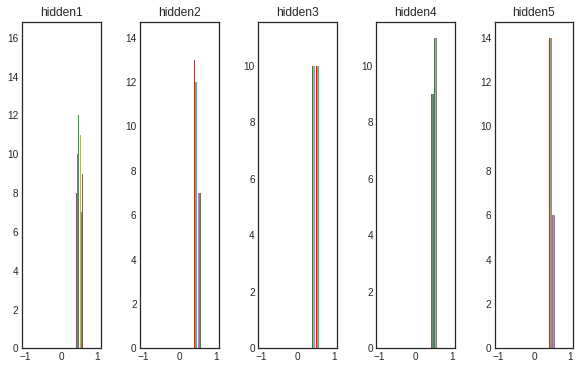

In [5]:
# initializers.RandomUniform()를 통해 균일분포를 따르는 무작위 값으로 초기화
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

#### Xavier 정규분포 초기화
은닉층의 노드의 수가 n이라면 표준편차가 1/√n 인 분포로 초기화 수행  
비교적 분포가 고르고 레이어마다 표현이 잘 되어있어 더 많은 가중치에 역전파가 전달 될 수 있다

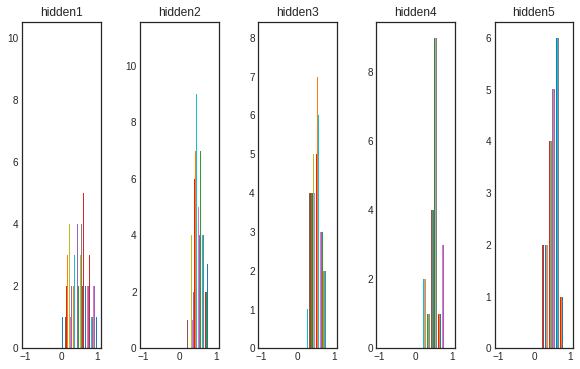

In [7]:
# initializers.GlorotNormal()를 적용
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

**Xavier(Glorot) 방법은 활성화 함수가 선형함수인 경우에 매우 적합** 

#### Xavier 균일분포 초기화
Xavier 정규분포 초기화와 마찬가지로 잘 분포됨

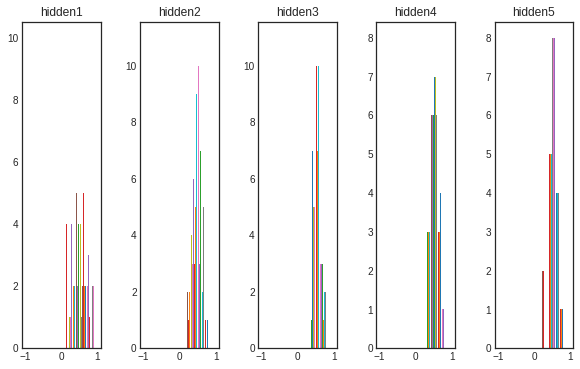

In [8]:
# initializers.GlorotUniform()를 통해 Xavier(Glorot) 균일분포 초기화를
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

활성화 함수를 sigmoid 대신 tanh를 적용하면 좀 더 균일한 분포의 모습을 보이는 것을 알 수 있다.

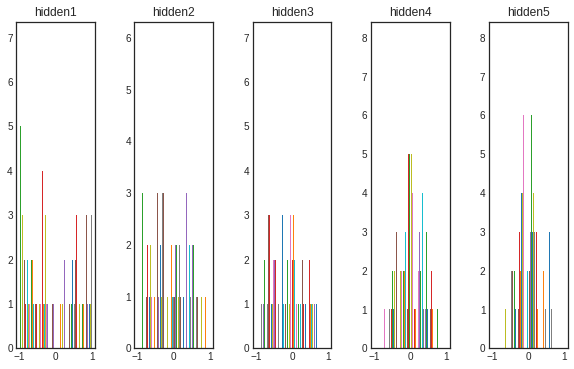

In [10]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

#### He 정규분포 초기화
표준편차가 √(2/n) 인 분포를 가지도록 초기화
활성화 값 분포가 균일하게 분포되어 있음

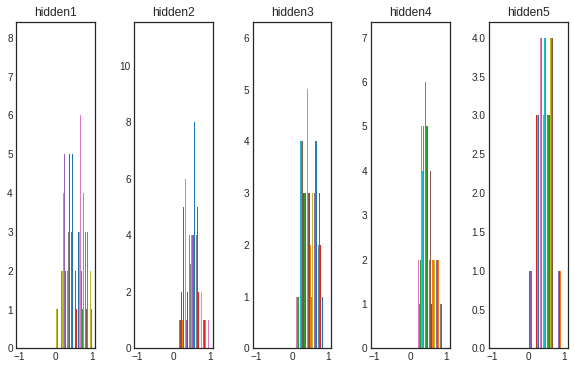

In [11]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

#### He 균일분포 초기화
He 정규분포 초기화와 유사하게 잘 분포됨

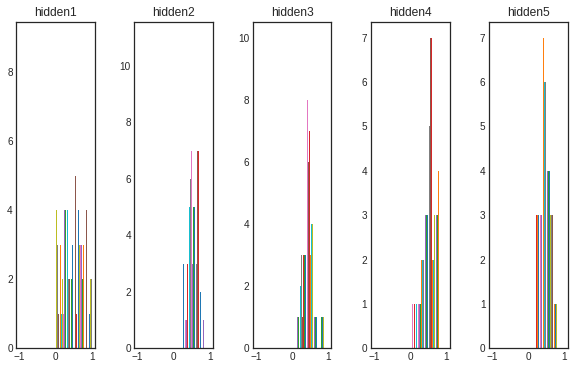

In [12]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

---
### 비선형 함수 가중치 초기화

#### 제로 초기화
가중치를 제로값으로 초기화 할 경우 각 레이어의 가중치 값 분포가 **0에만** 몰려 있음  
활성화 함수로 **ReLU**를 사용하였기 때문에 **0인 값은 그대로 0에만 머물러 있음**

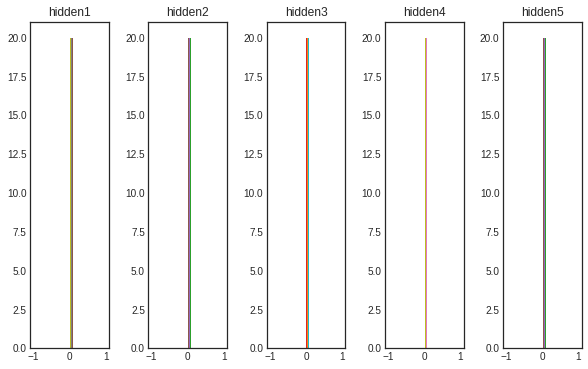

In [13]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

#### 정규분포 초기화
제로 초기화보다는 분포가 퍼져있는 것을 알 수 있음  
첫번째 Hidden 레이어를 제외하고 **0에 치우쳐 있는 문제**가 있음  

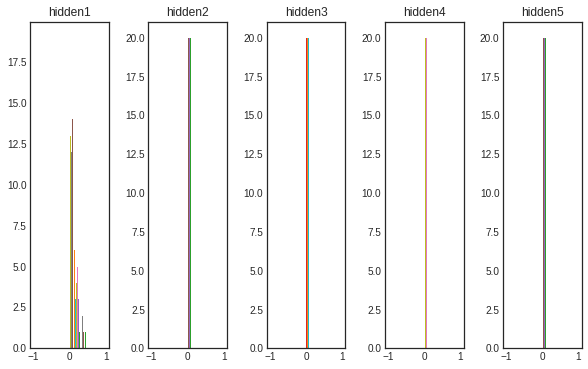

In [14]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

참고: 각 레이어의 값이 0에 몰려 있는 이유  
가중치 값이 활성화 함수로 사용한 reLU 함수를 통과하였기 때문 (relu(0)=0

#### 균일분포 초기화
마찬가지로 첫번째 Hidden 레이어를 제외하고 **0에 치우쳐 있는 문제**가 있음  

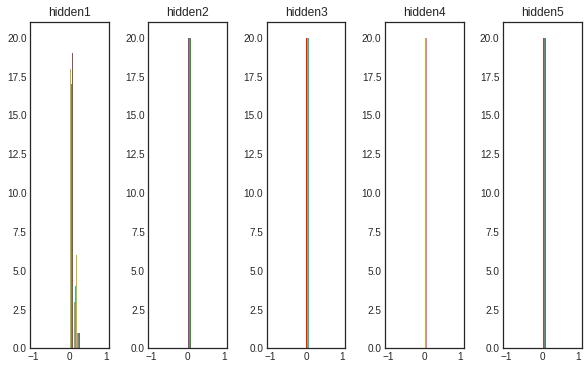

In [15]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

#### Xavier 정규분포 초기화
ReLU 특성상 0 인 값이 많지만, 어느 정도 분포가 퍼져 있음

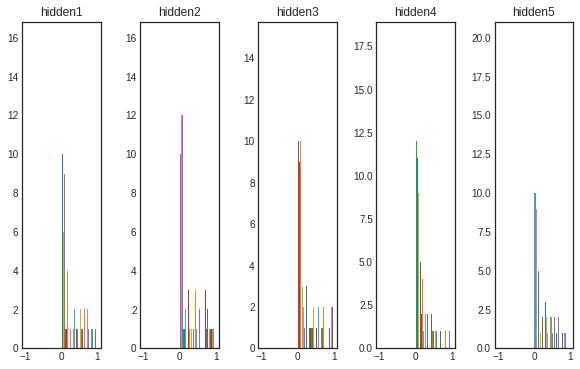

In [16]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

#### Xavier 균일분포 초기화
Xavier 정규분포 초기화와 유사하게 분포됨

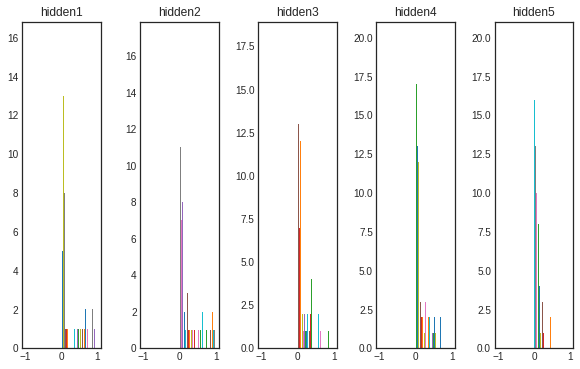

In [17]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

#### He 정규분포 초기화
**일반적으로 비선형 함수에 더 적합함**  
어느정도 분포가 고르게 형성됨

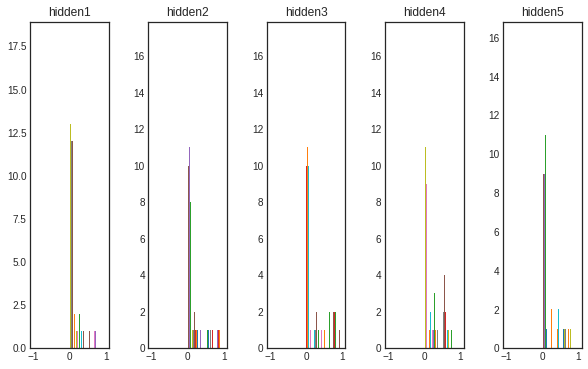

In [18]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

#### He 균일분포 초기화
He 정규분포 초기화와 유사하게 잘 분포됨

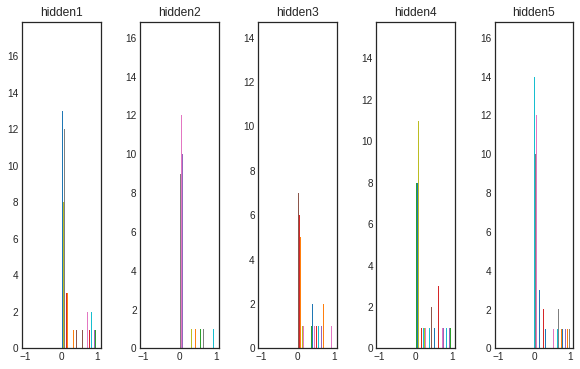

In [45]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

---
## Reuters 딥러닝 모델
---
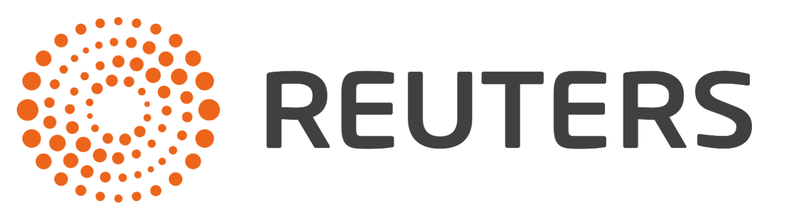  
Reuters 데이터셋은 뉴스 기사를 모아놓은 것으로 주제 분류를 위해 자주 사용하는 데이터  
입니다. 데이터셋은 뉴스 기사 텍스트와 46개의 토픽으로 구성  

### 데이터 로드 및 전처리
케라스에서는 Reuters 뉴스 기사 데이터를 reuters.load_data() 함수를 통해 다운로드가 가능  
본 예제에서는 num_words를 10000개로 제한하여 데이터를 로드  
기본적으로 8,982개의 훈련 데이터셋과 2,246개의 테스트 데이터셋으로 구분  
레이블을 통해 뉴스 기사의 주제로 46개가 있는 것을 알 수 있다

In [20]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


Reuters 데이터셋도 단어 인덱스로만 구성  
reuters.get_word_index() 함수를 통해 얻은 단어 인덱스 딕셔너리를 이용해 인덱스를 단어들로 변환이 가능  

In [21]:
word_index = reuters.get_word_index()
# word_index

인덱스 단어 딕셔너리 형태로 만들기 위해서 단어 인덱스 딕셔너리를 역으로 변환

In [22]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들기

단어 인덱스
- 0 : 패딩을 의미하는 토큰인 pad  
- 1 : 문장의 시작을 의미하는 토큰인 sos
- 2 : OOV(Out Of Vocabulary)를 의미하는 토큰인 unk  

i-3으로 인덱스를 맞춰주고, 해당 토큰들은 ?로 대체  

In [23]:
news = ' '.join([str(i) for i in train_data[0]])
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

원-핫 인코딩(one-hot encoding)을 이용해 텍스트를 0과 1의 벡터로 변환

In [24]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [25]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환  
케라스에서는 utils.to_categorical()을 이용해 쉽게 변환할 수 있다

In [26]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 구성

In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers

# 순차적으로 레이어를 추가하여 단순한 모델을 생성하기 위해 Sequential() 함수를 사용
model = models.Sequential()

# 첫번째는 유닛수 256개, 활성화 함수는 'relu', 입력 차원은 10000, 이름은 input인 Dense 레이어를 추가
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))

# 두번째도 마찬가지로 유닛수 256개를 가지고, relu 활성화 함수를 사용하며 이름은 hidden인 Dense 레이어를 추가
model.add(layers.Dense(128, activation='relu', name='hidden'))

# 세번째는 뉴스 주제 갯수로 유닛수를 46개, 다중 분류이므로 활성화 함수는 softmax, 이름은 output으로 지정한 Dense 레이어를 추가
model.add(layers.Dense(46, activation='softmax', name='output'))

### 모델 컴파일 및 학습

In [28]:
'''
옵티마이저 : rmsprop
손실 함수 : categorical_crossentropy (다중 분류)
지표 : accuracy 사용
'''
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


In [29]:
'''
학습용 데이터셋 : x_train, y_train
에폭(epochs) : 40
배치 사이즈 : 512
검증 테스트 데이터 : x_test, y_test
'''
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 43ms/step - loss: 2.1410 - accuracy: 0.5402 - val_loss: 1.3811 - val_accuracy: 0.6941
Epoch 2/40
18/18 [==============================] - 0s 16ms/step - loss: 1.0443 - accuracy: 0.7810 - val_loss: 1.1197 - val_accuracy: 0.7578
Epoch 3/40
18/18 [==============================] - 0s 15ms/step - loss: 0.7281 - accuracy: 0.8465 - val_loss: 0.9896 - val_accuracy: 0.7845
Epoch 4/40
18/18 [==============================] - 0s 15ms/step - loss: 0.5162 - accuracy: 0.8933 - val_loss: 0.9388 - val_accuracy: 0.7894
Epoch 5/40
18/18 [==============================] - 0s 25ms/step - loss: 0.3951 - accuracy: 0.9149 - val_loss: 0.9637 - val_accuracy: 0.7872
Epoch 6/40
18/18 [==============================] - 0s 15ms/step - loss: 0.2933 - accuracy: 0.9339 - val_loss: 0.9311 - val_accuracy: 0.7974
Epoch 7/40
18/18 [==============================] - 0s 16ms/step - loss: 0.2464 - accuracy: 0.9418 - val_loss: 0.9567 - val_accuracy: 0.7996
Epoch 8/40
18

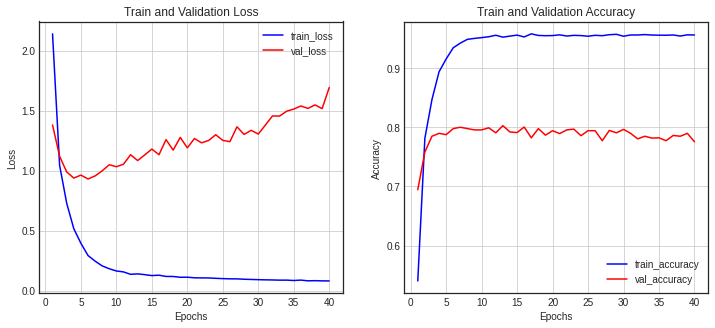

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델의 학습 결과
- 에폭이 진행될수록 val_loss는 계속 증가하고, val_accuracy는 조금씩 감소  
- 모델은 과대적합된 상태

### 가중치 초기화

In [32]:
'''
초기화 initializer에 따라 모델을 생성하는 build_model 함수
'''
def build_model(initializer):
    model = models.Sequential()
    model.add(layers.Dense(128,
                           activation='relu', 
                           kernel_initializer=initializer,
                           input_shape=(10000, ), 
                           name='input'))
    model.add(layers.Dense(128, 
                           activation='relu', 
                           kernel_initializer=initializer,
                           name='hidden'))
    model.add(layers.Dense(46, 
                           activation='softmax', 
                           name='output'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        epochs=40,
                        batch_size=512,
                        validation_data=(x_test, y_test))
    return history

In [33]:
'''
모델의 학습 히스토리 결과를 비교해보기 위해서 시각화하는 diff_history 함수
'''
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']
  
    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']
  
    epochs = range(1, len(h1_loss) + 1)
    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
  
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()
  
    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']
  
    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']
  
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()
  
    plt.show()

#### 제로 초기화

In [34]:
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 1s 52ms/step - loss: 3.8103 - accuracy: 0.0647 - val_loss: 3.7956 - val_accuracy: 0.3620
Epoch 2/40
18/18 [==============================] - 0s 22ms/step - loss: 3.7842 - accuracy: 0.3517 - val_loss: 3.7726 - val_accuracy: 0.3620
Epoch 3/40
18/18 [==============================] - 0s 18ms/step - loss: 3.7615 - accuracy: 0.3017 - val_loss: 3.7506 - val_accuracy: 0.3620
Epoch 4/40
18/18 [==============================] - 0s 20ms/step - loss: 3.7392 - accuracy: 0.3517 - val_loss: 3.7288 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 0s 21ms/step - loss: 3.7171 - accuracy: 0.3517 - val_loss: 3.7071 - val_accuracy: 0.3620
Epoch 6/40
18/18 [==============================] - 0s 20ms/step - loss: 3.6952 - accuracy: 0.3517 - val_loss: 3.6856 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 0s 18ms/step - loss: 3.6735 - accuracy: 0.3517 - val_loss: 3.6644 - val_accuracy: 0.3620
Epoch 8/40
18

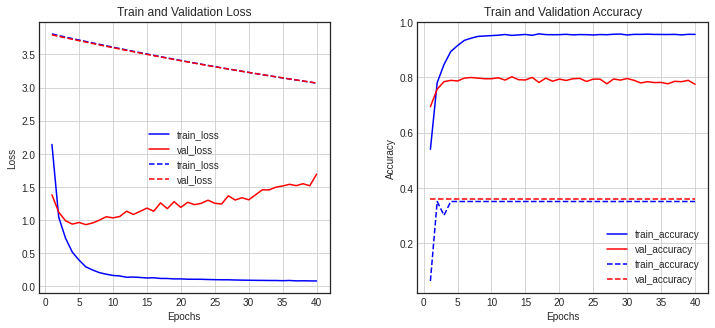

In [35]:
diff_history(history, zero_history)

기본 모델과 제로 초기화 모델 학습 결과를 비교해보면, 제로 초기화 모델은 학습이 제대로 되고 있지 않다는 것을 알 수 있습니다.  

#### 정규분포 초기화

In [36]:
normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 [==============================] - 1s 32ms/step - loss: 2.2956 - accuracy: 0.5185 - val_loss: 1.5695 - val_accuracy: 0.6518
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 1.2805 - accuracy: 0.7115 - val_loss: 1.2846 - val_accuracy: 0.7066
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.9672 - accuracy: 0.7827 - val_loss: 1.1480 - val_accuracy: 0.7378
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7393 - accuracy: 0.8405 - val_loss: 1.0350 - val_accuracy: 0.7685
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.5700 - accuracy: 0.8736 - val_loss: 0.9983 - val_accuracy: 0.7850
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.4397 - accuracy: 0.9037 - val_loss: 0.9458 - val_accuracy: 0.7890
Epoch 7/40
18/18 [==============================] - 0s 12ms/step - loss: 0.3529 - accuracy: 0.9243 - val_loss: 0.9884 - val_accuracy: 0.7894
Epoch 8/40
18

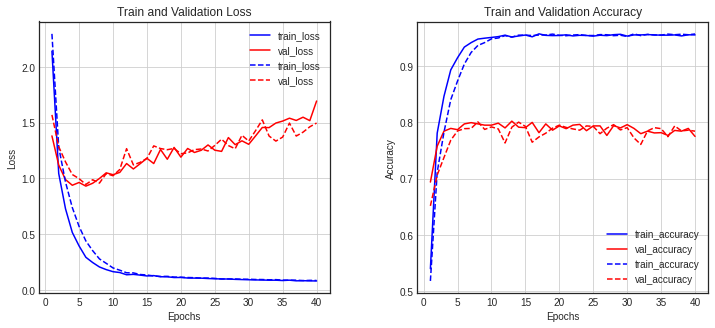

In [37]:
diff_history(history, normal_history)

정규분포로 초기화한 결과는 기본 모델과 유사하지만 조금 더디게 학습된 것을 알 수 있습니다.

#### Xavier(Glorot) 초기화

In [38]:
glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 [==============================] - 1s 46ms/step - loss: 2.0596 - accuracy: 0.5757 - val_loss: 1.4018 - val_accuracy: 0.6848
Epoch 2/40
18/18 [==============================] - 0s 19ms/step - loss: 1.0472 - accuracy: 0.7698 - val_loss: 1.1130 - val_accuracy: 0.7427
Epoch 3/40
18/18 [==============================] - 0s 18ms/step - loss: 0.7320 - accuracy: 0.8426 - val_loss: 0.9990 - val_accuracy: 0.7716
Epoch 4/40
18/18 [==============================] - 0s 20ms/step - loss: 0.5203 - accuracy: 0.8917 - val_loss: 0.9641 - val_accuracy: 0.7747
Epoch 5/40
18/18 [==============================] - 0s 22ms/step - loss: 0.3803 - accuracy: 0.9192 - val_loss: 0.9518 - val_accuracy: 0.7894
Epoch 6/40
18/18 [==============================] - 0s 22ms/step - loss: 0.2879 - accuracy: 0.9356 - val_loss: 0.9159 - val_accuracy: 0.7925
Epoch 7/40
18/18 [==============================] - 0s 20ms/step - loss: 0.2385 - accuracy: 0.9440 - val_loss: 0.9824 - val_accuracy: 0.7921
Epoch 8/40
18

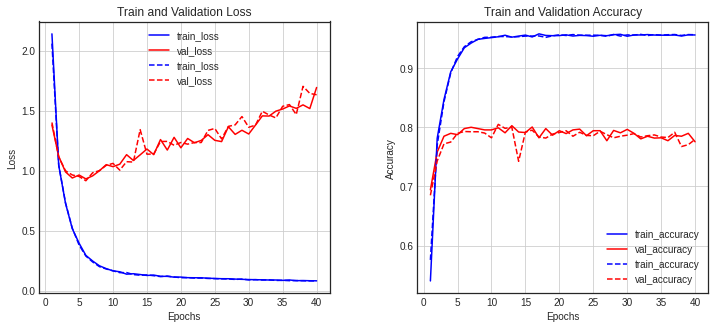

In [39]:
diff_history(history, glorot_history)

Xavier 초기화 방법은 기존 모델에서 사용하는 균일분포와 매우 유사한 형태로 학습된 것을 알 수 있습니다

#### He 초기화

In [40]:
he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 [==============================] - 1s 44ms/step - loss: 2.0089 - accuracy: 0.5905 - val_loss: 1.3128 - val_accuracy: 0.7102
Epoch 2/40
18/18 [==============================] - 0s 18ms/step - loss: 0.9714 - accuracy: 0.7896 - val_loss: 1.1094 - val_accuracy: 0.7502
Epoch 3/40
18/18 [==============================] - 0s 20ms/step - loss: 0.6547 - accuracy: 0.8618 - val_loss: 0.9512 - val_accuracy: 0.7907
Epoch 4/40
18/18 [==============================] - 0s 19ms/step - loss: 0.4628 - accuracy: 0.9016 - val_loss: 0.9235 - val_accuracy: 0.7943
Epoch 5/40
18/18 [==============================] - 0s 18ms/step - loss: 0.3284 - accuracy: 0.9284 - val_loss: 0.9022 - val_accuracy: 0.7996
Epoch 6/40
18/18 [==============================] - 0s 16ms/step - loss: 0.2590 - accuracy: 0.9427 - val_loss: 0.9778 - val_accuracy: 0.7952
Epoch 7/40
18/18 [==============================] - 0s 16ms/step - loss: 0.2092 - accuracy: 0.9503 - val_loss: 0.9761 - val_accuracy: 0.7952
Epoch 8/40
18

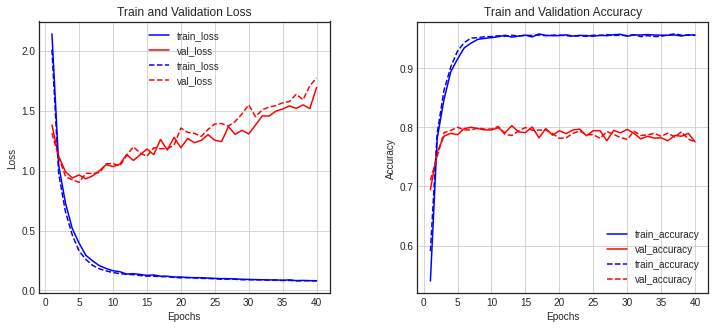

In [41]:
diff_history(history, he_history)

He 초기화는 기존 모델과 비교하여 작지만 좀 더 빠르게 학습된 것을 알 수 있습니다.  
현재 모델이 **비선형 함수인 relu를 사용하여 He 초기화에 더 적합**한 것을 알 수 있습니다.

---
## 배치 정규화(Batch Normalization)
---
모델에 입력되는 샘플들을 균일하게 만드는 방법  
가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용  

보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행  
- 학습 자체가 빨리 진행될 수 있도록 만들어 준다
- 학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와준다
- 초기값에 크게 의존하지 않아도 되고, 과대적합을 방지하는 역할을 수행

배치 정규화는 데이터 전처리 단계에서 진행해도 되지만  
정규화가 되어서 레이어에 들어갔다는 보장이 없으므로  
**주로 Dense 레이어 이후, 활성화 함수 이전에 활용**
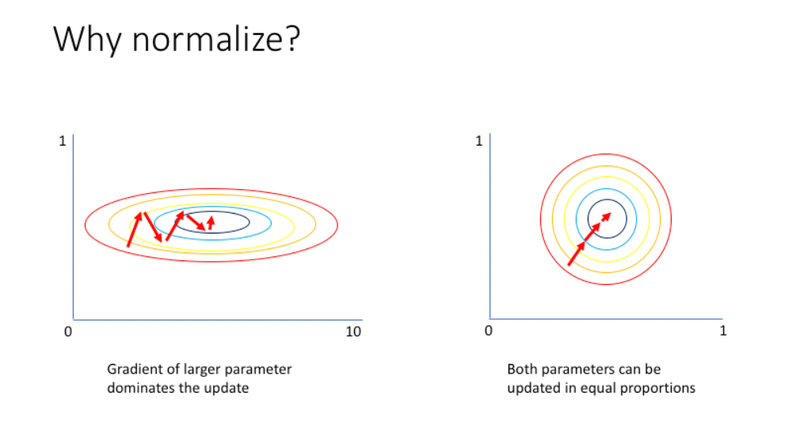  

### 모델 구성 및 컴파일
기존에 정의했던 3개의 Dense 레이어 사이에 배치 정규화를 위해 BatchNormalization() 레이어를 추가  
**일반적으로 Dense 레이어와 Activation 활성함수 레이어 사이에 추가**

In [46]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)              

In [47]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 2s 49ms/step - loss: 1.6820 - accuracy: 0.6643 - val_loss: 3.3168 - val_accuracy: 0.7351
Epoch 2/40
18/18 [==============================] - 0s 19ms/step - loss: 0.6266 - accuracy: 0.8792 - val_loss: 3.0668 - val_accuracy: 0.7449
Epoch 3/40
18/18 [==============================] - 0s 19ms/step - loss: 0.3427 - accuracy: 0.9355 - val_loss: 2.7259 - val_accuracy: 0.6839
Epoch 4/40
18/18 [==============================] - 0s 21ms/step - loss: 0.2313 - accuracy: 0.9478 - val_loss: 2.4008 - val_accuracy: 0.6817
Epoch 5/40
18/18 [==============================] - 0s 21ms/step - loss: 0.1801 - accuracy: 0.9511 - val_loss: 2.0630 - val_accuracy: 0.7217
Epoch 6/40
18/18 [==============================] - 0s 23ms/step - loss: 0.1544 - accuracy: 0.9521 - val_loss: 1.7377 - val_accuracy: 0.7115
Epoch 7/40
18/18 [==============================] - 0s 20ms/step - loss: 0.1354 - accuracy: 0.9520 - val_loss: 1.5049 - val_accuracy: 0.7284
Epoch 8/40
18

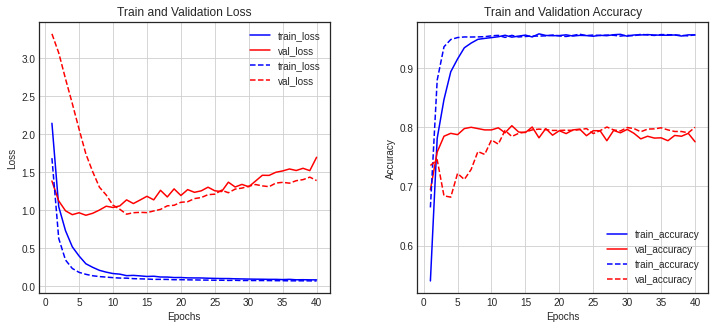

In [48]:
diff_history(history, batch_norm_history)

기본 모델과 배치 정규화를 적용한 모델을 비교  
배치 정규화를 적용한 모델이 좀 더 빠르고 안정되게 학습이 되는 것을 알 수 있다.